In [ ]:
!pip install deepxde
import matplotlib.pyplot as plt          # For Plot
import numpy                      # Array and math functions handling
import deepxde as dde                    # library for PINN
import tensorflow as tf                  # For handling tensor, running program in gpu and Machine Learning
from scipy.interpolate import griddata   # To form a grid of data
# from mpmath import *

In [ ]:

def domain(x_lower, x_upper, t_lower, t_upper) :
    x = numpy.linspace (x_lower, x_upper, 520)
    t = numpy.linspace (t_lower, t_upper, 400)
    X, T = numpy.meshgrid(x, t)
    X_star = numpy.hstack((X.flatten()[:, None], T.flatten()[:, None]))
    space_domain = dde.geometry.Interval(x_lower, x_upper)
    time_domain = dde.geometry.TimeDomain(t_lower, t_upper)
    geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)
    return geomtime, X, T, X_star

def pde(x, y):

    u = y[:, 0:1]
    u_t = dde.grad.jacobian(y, x, j=1)
    u_x = dde.grad.jacobian(y, x, j=0)
    u_xxx = dde.grad.hessian(u_x, x, j=0)

    f_u = u_t - 3/2* u**2 * u_x - 1/4*u_xxx

    return f_u

def num(x, t) :
    q = 4 * ( numpy.e )**( 2 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * \
lambda1 * ( ( 1 + ( ( numpy.e )**( 12 * lambda1 * ( x + t * ( lambda1 \
)**( 2 ) ) ) + ( ( numpy.e )**( 8 * lambda1 * ( x + t * ( lambda1 \
)**( 2 ) ) ) * ( 3 + ( 64 * ( x )**( 4 ) * ( lambda1 )**( 4 ) + ( \
1584 * ( t )**( 2 ) * ( lambda1 )**( 6 ) + ( -5184 * ( t )**( 3 ) * ( \
lambda1 )**( 9 ) + ( 5184 * ( t )**( 4 ) * ( lambda1 )**( 12 ) + ( 64 \
* ( x )**( 3 ) * ( lambda1 )**( 3 ) * ( -1 + 12 * t * ( lambda1 )**( \
3 ) ) + ( 96 * t * x * ( lambda1 )**( 4 ) * ( 5 + ( -42 * t * ( \
lambda1 )**( 3 ) + 72 * ( t )**( 2 ) * ( lambda1 )**( 6 ) ) ) + 48 * \
( x )**( 2 ) * ( ( lambda1 )**( 2 ) + ( -20 * t * ( lambda1 )**( 5 ) \
+ 72 * ( t )**( 2 ) * ( lambda1 )**( 8 ) ) ) ) ) ) ) ) ) ) + ( \
numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * ( 3 + ( \
64 * ( x )**( 4 ) * ( lambda1 )**( 4 ) + ( 1584 * ( t )**( 2 ) * ( \
lambda1 )**( 6 ) + ( 5184 * ( t )**( 3 ) * ( lambda1 )**( 9 ) + ( \
5184 * ( t )**( 4 ) * ( lambda1 )**( 12 ) + ( 64 * ( x )**( 3 ) * ( ( \
lambda1 )**( 3 ) + 12 * t * ( lambda1 )**( 6 ) ) + ( 96 * t * x * ( \
lambda1 )**( 4 ) * ( 5 + ( 42 * t * ( lambda1 )**( 3 ) + 72 * ( t \
)**( 2 ) * ( lambda1 )**( 6 ) ) ) + 48 * ( x )**( 2 ) * ( ( lambda1 \
)**( 2 ) + ( 20 * t * ( lambda1 )**( 5 ) + 72 * ( t )**( 2 ) * ( \
lambda1 )**( 8 ) ) ) ) ) ) ) ) ) ) ) ) ) )**( -1 ) * ( 3 + ( 8 * ( x \
)**( 2 ) * ( lambda1 )**( 2 ) + ( 60 * t * ( lambda1 )**( 3 ) + ( 72 \
* ( t )**( 2 ) * ( lambda1 )**( 6 ) + ( 12 * x * ( lambda1 + 4 * t * \
( lambda1 )**( 4 ) ) + ( ( numpy.e )**( 8 * lambda1 * ( x + t * ( \
lambda1 )**( 2 ) ) ) * ( 3 + ( 8 * ( x )**( 2 ) * ( lambda1 )**( 2 ) \
+ ( -60 * t * ( lambda1 )**( 3 ) + ( 72 * ( t )**( 2 ) * ( lambda1 \
)**( 6 ) + 12 * x * lambda1 * ( -1 + 4 * t * ( lambda1 )**( 3 ) ) ) ) \
) ) + -2 * ( numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 )**( 2 ) \
) ) * ( 32 * ( x )**( 4 ) * ( lambda1 )**( 4 ) + ( 384 * t * ( x )**( \
3 ) * ( lambda1 )**( 6 ) + ( 192 * t * x * ( lambda1 )**( 4 ) * ( 1 + \
18 * ( t )**( 2 ) * ( lambda1 )**( 6 ) ) + ( 16 * ( x )**( 2 ) * ( ( \
lambda1 )**( 2 ) + 108 * ( t )**( 2 ) * ( lambda1 )**( 8 ) ) + 3 * ( \
-1 + ( 48 * ( t )**( 2 ) * ( lambda1 )**( 6 ) + 864 * ( t )**( 4 ) * \
( lambda1 )**( 12 ) ) ) ) ) ) ) ) ) ) ) ) )
    return q
def cond_u_rw(xm) :
    x = xm [:, 0:1]
    t = xm [:, 1:2]
    u = num (x, t)
    return u
def netmodel(data, neuron, layer, out) :
    net = dde.maps.FNN ([2] + [neuron] * layer + [out], 'tanh', 'Glorot normal')
    model = dde.Model (data, net)
    model.compile ('adam', lr = 1e-3, loss = 'MSE')
    return model
def bound_1(x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmin)

def bound_2(x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmax)


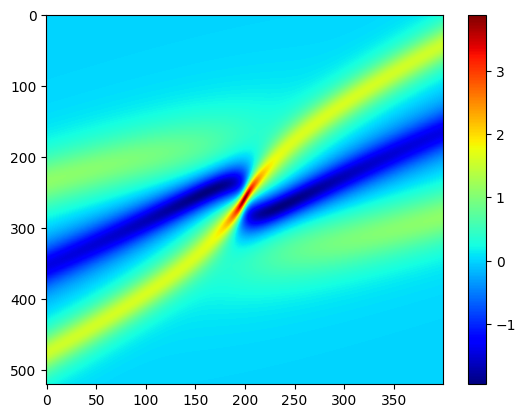

In [ ]:
xmin = -9
xmax = 9
tmin = -9
tmax = 9
geomtime1, X1, T1, X_star1 = domain(xmin, xmax, tmin, tmax)
lambda1 = 0.65
u = num (X1, T1)
plt.imshow (u.T, aspect = "auto", cmap = "jet")
plt.colorbar ()


In [ ]:
points = numpy.array([[i, 0] for i in numpy.arange(xmin, xmax, 0.01)])
val1 = cond_u_rw (points)
points1 = numpy.array([[-10, i] for i in numpy.arange(tmin, tmax, 0.01)])
val11 = cond_u_rw (points1)
points2 = numpy.array([[10, i] for i in numpy.arange(tmin, tmax, 0.01)])
val12 = cond_u_rw (points2)
ic_boundnew1 = dde.PointSetBC(points1, val11, component=0, batch_size = None, shuffle=True)
ic_boundnew11 = dde.PointSetBC(points2, val12, component=0, batch_size = None, shuffle=True)
bc_u_0 = dde.DirichletBC (geomtime1, cond_u_rw, bound_1, component = 0)
bc_u_1 = dde.DirichletBC (geomtime1, cond_u_rw, bound_2, component = 0)
bc_u_n = dde.DirichletBC (geomtime1, cond_u_rw, lambda _, on_boundary: on_boundary, component = 0)
ic_u = dde.IC (geomtime1, cond_u_rw, lambda _, on_initial: on_initial, component = 0)
ic_u_new = dde.PointSetBC(points, val1, component=0, batch_size = None, shuffle=True)

In [ ]:
data = dde.data.TimePDE (geomtime1,
                        pde,
                        [ic_boundnew1, ic_boundnew11, ic_u_new], #   bc_u_0,bc_u_1,
                        num_domain = 10000,
                        num_initial = 200,
                        num_boundary = 200,
                        train_distribution = "pseudo")


In [ ]:
mod1 = netmodel (data, 30, 6, 1)

Compiling model...
Building feed-forward neural network...
'build' took 0.087326 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.327039 s



In [ ]:
dde.optimizers.config.set_LBFGS_options(maxcor=50,
            ftol=1.0 * numpy.finfo(float).eps,    gtol=1e-08,    maxiter=50000,    maxfun=20000,    maxls=50,)
mod1.train (iterations=80000, display_every=1000)

mod1.compile("L-BFGS")
mod1.train()


Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [2.56e-02, 6.95e-01, 7.13e-01, 1.12e+00]    [2.56e-02, 6.95e-01, 7.13e-01, 1.12e+00]    []  
1000      [8.32e-03, 1.24e-04, 1.17e-04, 1.68e-03]    [8.32e-03, 1.24e-04, 1.17e-04, 1.68e-03]    []  
2000      [5.64e-03, 3.15e-04, 1.73e-04, 1.10e-03]    [5.64e-03, 3.15e-04, 1.73e-04, 1.10e-03]    []  
3000      [3.11e-03, 3.48e-05, 5.13e-05, 4.00e-04]    [3.11e-03, 3.48e-05, 5.13e-05, 4.00e-04]    []  
4000      [2.56e-03, 2.21e-05, 3.47e-05, 2.63e-04]    [2.56e-03, 2.21e-05, 3.47e-05, 2.63e-04]    []  
5000      [2.90e-03, 4.80e-04, 2.16e-04, 5.06e-04]    [2.90e-03, 4.80e-04, 2.16e-04, 5.06e-04]    []  
6000      [1.85e-03, 5.46e-05, 4.96e-05, 1.26e-04]    [1.85e-03, 5.46e-05, 4.96e-05, 1.26e-04]    []  
7000      [2.75e-03, 4.78e-05, 2.98e-05, 1.09e-04]    [2.75e-03, 4.78e-05, 2.98e-05, 1.09e-04]    []  
8000      [1.20e-03, 1.81e-05, 1.31e-05, 6.48e-

(<deepxde.model.LossHistory at 0x7b6424539c90>,
 <deepxde.model.TrainState at 0x7b642453a680>)

In [ ]:
# Make prediction
prediction = mod1.predict(X_star1, operator=None)

u2 = griddata(X_star1, prediction[:, 0], (X1, T1), method="cubic")

print (prediction.shape, prediction[:, 0].shape)

(208000, 1) (208000,)


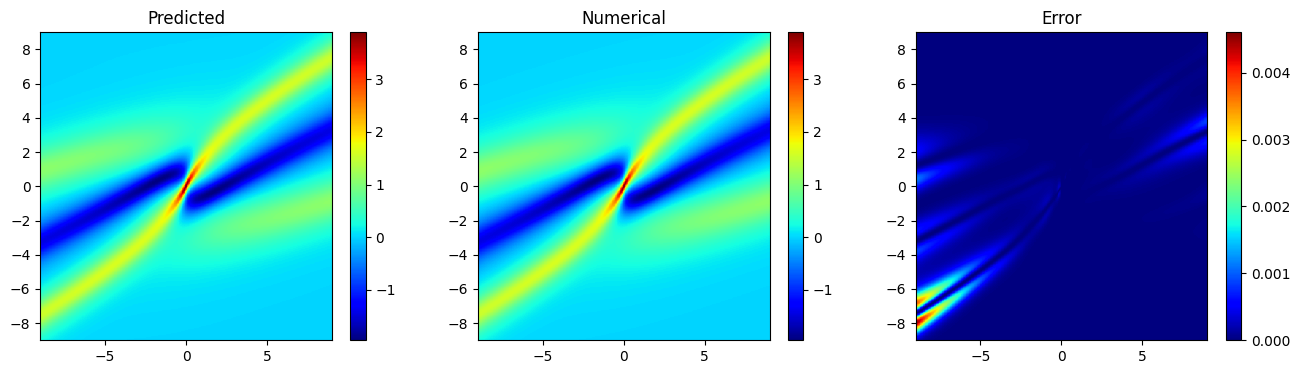

In [ ]:
ext1 = [tmin, tmax, xmin, xmax]

plt.figure (figsize = (16, 4))
plt.subplot (1, 3, 1)
plt.title("Predicted")
plt.imshow(
    u2.T,
    interpolation="nearest", cmap="jet",
    extent=ext1,

    aspect="auto")
plt.colorbar ()
plt.subplot (1, 3, 2)
plt.title("Numerical")
plt.imshow(
    u.T,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto", )
plt.colorbar ()
plt.subplot (1, 3, 3)
plt.title("Error")
plt.imshow(
    abs(u.T - u2.T)**2,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto")
plt.colorbar ()
plt.savefig ("KdV_soliton_solution.jpg")
plt.show ()

In [ ]:
u_num = num (X_star1[:, 0:1], X_star1[:, 1:2])
file1 = open ("mkdv-3pos.txt", 'w')
file1.write ("x"+" "+"t"+" "+"u"+" "+"uN\n")
for i in range (len(X_star1)) :
    file1.write (str(X_star1[i, 0])+" "+str(X_star1[i, 1]) +" "+str(u_num[i, 0])+" "+str(prediction[i, 0])+"\n")
import pandas as pd
val_out = pd.read_csv("mkdv-3pos.txt", sep = " ")
print (val_out.shape)


(208025, 4)
